In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./surveyData/survey_data.csv")

In [3]:
df.sample(3)

,response,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,1,18 - 29,Female,Passenger,I usually drive 5 or more over the speed limit,UHD for speed,Defensive,No,Yes,Yes,Yes,Yes
13,14,40 - 49,Male,Driver,I usually drive around the speed limit,Speedometer,Defensive,Yes,Yes,Yes,Yes,Yes
16,17,18 - 29,Male,Driver,I usually drive 5 or more over the speed limit,speedometer,Aggressive,Yes,No,No,No,Yes


In [4]:
tmp = np.unique(df['Q4'])
tmp

array(['I usually drive 5 or more over the speed limit',
       'I usually drive 5 or more under the speed limit',
       'I usually drive around the speed limit'], dtype=object)

In [5]:
df.replace(to_replace=tmp, 
           value=['5 over', '5 under', 'around limit'], inplace=True)

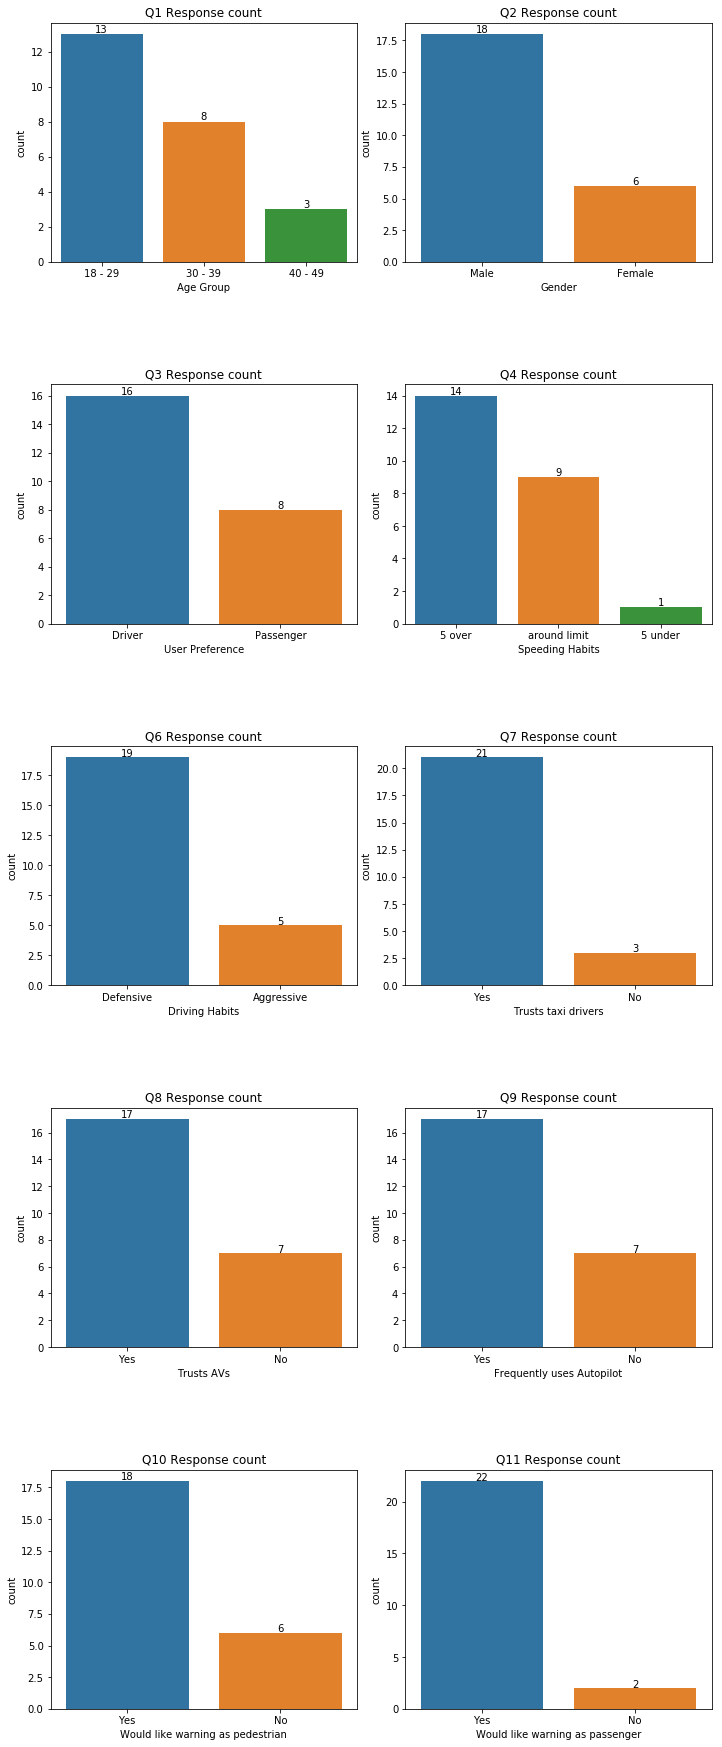

In [6]:
def get_question_nums(num_questions): 
    for i in range(1,num_questions+1):
        if i == 5: continue
        else:
            yield i
def add_text(ax, nums):
    '''Adds value counts above ax bars with given num counts
    :param ax: seaborn axes object
    :param nums: list of labels for the axes bars
    
    :return: none
    '''
    for i,p in enumerate(ax.patches):
        ax.text(p.get_x() + p.get_width()/2.,
                p.get_height() + 0.1,
                nums[i],
                ha='center')
        
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
gen = get_question_nums(12)
for i in range(5):
    for j in range(2):
        q_num = next(gen)
        f = sns.countplot(x='Q{}'.format(q_num) ,data=df, ax=ax[i][j], order=df['Q{}'.format(q_num)].value_counts().index)
        f.set_title("Q{} Response count".format(q_num))
        add_text(ax[i][j], df['Q{}'.format(q_num)].value_counts())
fig.tight_layout()
plt.subplots_adjust(top=2)

ax[0][0].set_xlabel('Age Group')
ax[0][1].set_xlabel('Gender')
ax[1][0].set_xlabel('User Preference')
ax[1][1].set_xlabel('Speeding Habits')
ax[2][0].set_xlabel('Driving Habits')
ax[2][1].set_xlabel('Trusts taxi drivers')
ax[3][0].set_xlabel('Trusts AVs')
ax[3][1].set_xlabel('Frequently uses Autopilot')
ax[4][0].set_xlabel('Would like warning as pedestrian')
ax[4][1].set_xlabel('Would like warning as passenger')

fig.savefig('./countplots', bbox_inches='tight')
None

In [9]:
from re import IGNORECASE
drivers = df[df['Q3'] == 'Driver']
speedometer_mentions = drivers[drivers['Q5'].str.contains('speed', flags=IGNORECASE)]['Q6'].count()
print('\nFraction of speedometer mentions w/ driving prefernce: ', speedometer_mentions/drivers.shape[0])


Fraction of speedometer mentions w/ driving prefernce:  0.875


In [ ]:
print('Other mentions:')
df[~df['Q5'].str.contains('speed', flags=IGNORECASE)]['Q5']